<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/SVM_for_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/cement_slump.csv')

In [3]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<Axes: >

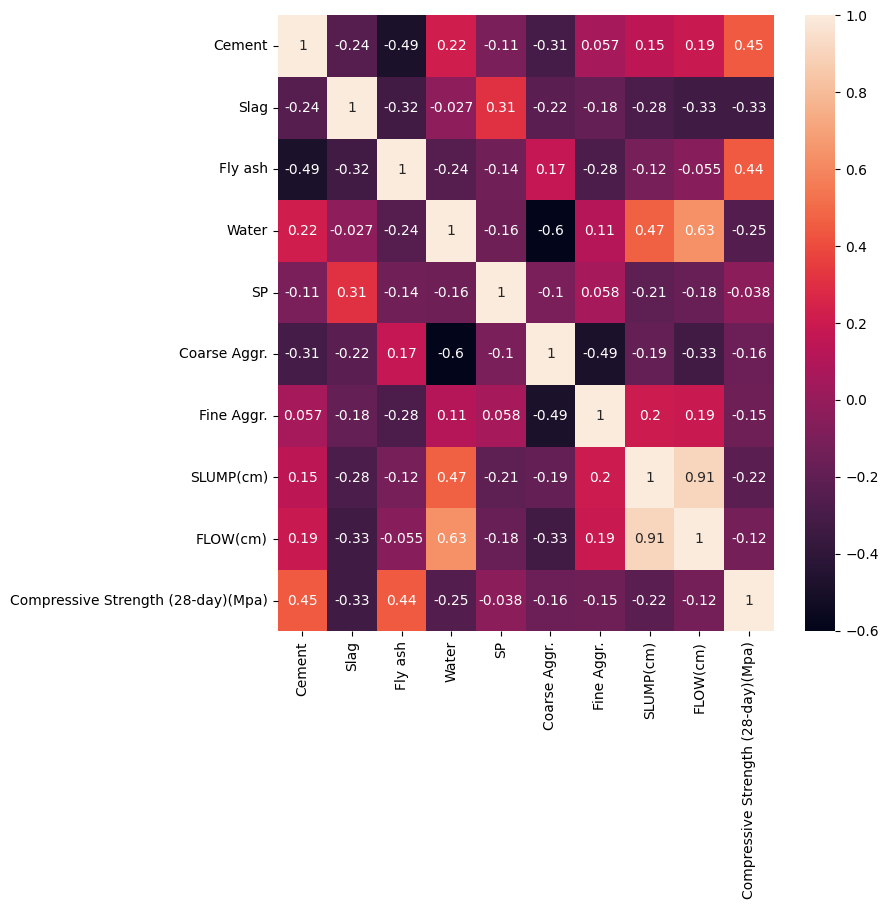

In [9]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [12]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [13]:
y=df['Compressive Strength (28-day)(Mpa)']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
scaled_X_train=scaler.fit_transform(X_train)

In [19]:
scaled_X_test=scaler.transform(X_test)

In [21]:
from sklearn.svm import SVR,LinearSVR
# LinearSVR can only use linear kernel so if you want to use any other kernel dount import LinearSVR

In [22]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

**this is just a base model with default parameters**


In [23]:
base_model=SVR()

In [24]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [25]:
base_pred=base_model.predict(scaled_X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
mean_absolute_error(y_test,base_pred)

5.236902091259178

In [28]:
mean_squared_error(y_test,base_pred)

44.83527552212948

In [29]:
np.sqrt(mean_squared_error(y_test,base_pred))

6.695914838327133

In [30]:
y_test.mean()

36.26870967741935

**now we do the grid search**

In [38]:
param_grid={'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],
          'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}
# epsilon is the error you willing to allow to training data instance

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
svr=SVR()

In [41]:
grid=GridSearchCV(svr,param_grid)

In [42]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [43]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [44]:
grid_pred=grid.predict(scaled_X_test)

In [45]:
mean_absolute_error(y_test,grid_pred)

2.5128012210762365

In [47]:
mean_squared_error(y_test,grid_pred)

10.10102074357006

In [48]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.178210305119858